In [83]:
import pandas as pd
import numpy as np
import random as r
import matplotlib.pyplot as plt
from scipy import stats
from iminuit import Minuit                            
from numpy.linalg import inv
import sys
import inspect
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset


In [2]:
def get_weighted_mean(x, x_err):
    mean_weighted = np.nansum(x/x_err**2) / np.nansum(1/x_err**2)
    err_weighted = np.sqrt(1/np.sum(1 / x_err**2)) 
    chi2 = np.nansum((x - mean_weighted)**2/x_err**2)
    p = stats.chi2.sf(chi2, len(x) - 1)
    
    print(f'The weighted mean is:              {mean_weighted:.3f}')
    print(f'The error on the weighted mean is: {mean_weighted:.3f}')
    print(fr'The $\chi^2$ is: {mean_weighted:.3f}')
    print(f'The p value is : {mean_weighted:.3f}')
    return mean_weighted, err_weighted, chi2, p

In [3]:
sys.path.append('External_Functions')
from ExternalFunctions import *

## 1.3

In [38]:
frac1 = stats.norm.sf(1.85, loc = 1.68, scale = 0.06)
print(frac1)

0.002303266131695864


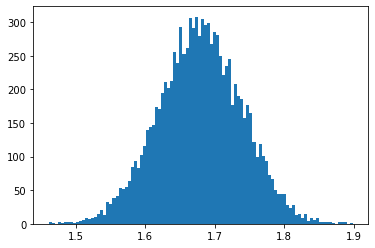

1.7622940449352849


In [29]:
heights = np.random.normal(size = 10000, loc = 1.68, scale = 0.06)
plt.hist(heights, bins = 100)
plt.show()

mask = np.arange(len(heights)) > 4 *len(sorted(heights)) // 5

heights20 = np.sort(heights)[mask]
print(np.mean(heights20))

In [39]:
print(type(heights20))

<class 'numpy.ndarray'>


# 5.1

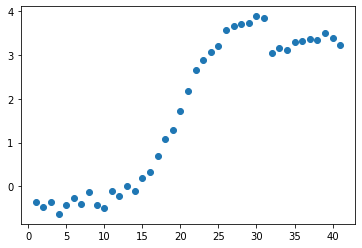

In [7]:
month, _, deficit, deficit_err = np.genfromtxt('https://www.nbi.dk/~petersen/Teaching/Stat2016/data_LukeLightningLights.txt').T


plt.scatter(month, deficit)
plt.show()



The weighted mean is:              -0.359
The error on the weighted mean is: -0.359
The $\chi^2$ is: -0.359
The p value is : -0.359


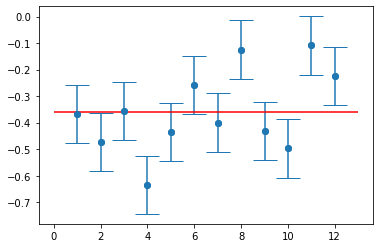

0.024622251837895934


In [8]:
month_12 = month[month<=12]
error_12 = deficit_err[month<=12]
deficit_12 = deficit[month<=12]

plt.scatter(month_12, deficit[month<=12])
plt.errorbar(month_12, deficit[month<=12], yerr = deficit_err[month<=12], fmt = 'o', capsize = 12)
weighted_avg, weighted_err, chi2, p = get_weighted_mean(deficit[month<=12], deficit_err[month<=12])
plt.hlines(weighted_avg, 0, 13, color = 'red')
plt.show()

print(p)

In [9]:
def linear(x, a, b):
    return a*x + b

def chi2(a, b):
    model = linear(month_12, a, b)
    return np.sum((model - deficit_12)**2 / error_12**2)

fit = Minuit(chi2, 1, -0.4)
fit.errordef = 1
fit.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 17.32                      │              Nfcn = 32               │
│ EDM = 1.65e-22 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   0.020   │   0.009   │            │            │         │         │       │
│ 1 │ b    │   -0.49   │   0.07    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        b │
├───┼───────────────────┤
│ a │ 8.46e-05 -0.55e-3 │
│ b │ -0.55e-3  0.00458 │
└───┴───────────────────┘

0.06754828514924785


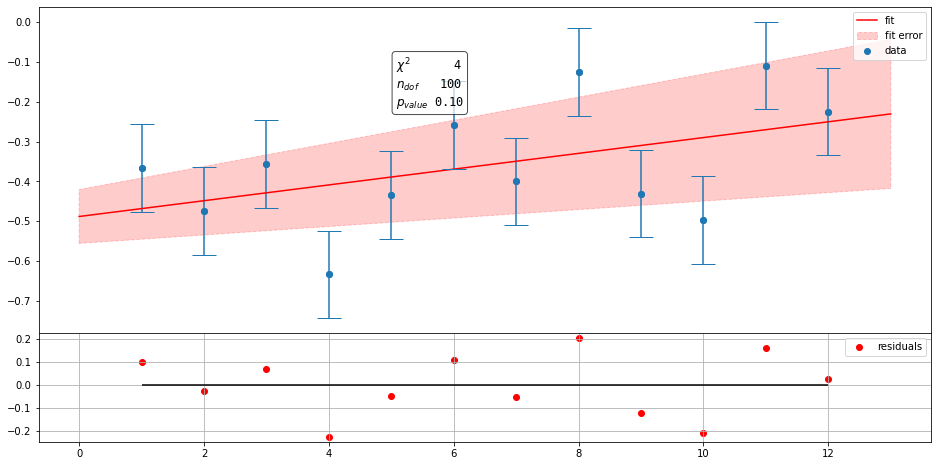

In [85]:
a, b = fit.values[:]
a_err, b_err = fit.errors[:]

p    = stats.chi2.sf(fit.fval, len(month_12) - 2)
x_fit = np.linspace(0, 13, 100)

fig = plt.figure(figsize = (16,8))
gs = gridspec.GridSpec(nrows = 2,ncols = 1, height_ratios=[3, 1], hspace = 0) 
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharex=ax1)

ax1.plot(x_fit, linear(x_fit, a, b), color = 'red', label = 'fit')
ax1.fill_between(x_fit, linear(x_fit, a+a_err, b+b_err), linear(x_fit, a-a_err, b-b_err), color = 'red',
                 alpha = 0.2, edgecolor = 'red', ls = 'dashed', label = 'fit error')
ax1.scatter(month_12, deficit[month<=12], label = 'data')
ax1.errorbar(month_12, deficit[month<=12], yerr = deficit_err[month<=12], fmt = 'o', capsize = 12)
ax2.hlines(0,1,12, color = 'black')
ax2.scatter(month_12, deficit[month<=12] - linear(month_12, a, b), color = 'red', label = 'residuals')
ax2.grid()
ax1.xaxis.set_visible(False)
ax1.legend()
ax2.legend()



dic = {r'$\chi^2$': 4,
       r'$n_{dof}$': 100,
       r'$p_{value}$': 0.1}
text = nice_string_output(dic, extra_spacing = 0, decimals = 2)
add_text_to_ax(0.4, 0.85, text, ax1, bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

print(p)

In [110]:
for i in range(1, len(month)):
    month_temp = month[month<=i]
    error_temp = deficit_err[month<=i]
    deficit_temp = deficit[month<=i]
    def chi2(a, b):
        model = linear(month_temp, a, b)
        return np.sum((model - deficit_temp)**2 / error_temp**2)

    fit = Minuit(chi2, 1, -0.4)
    fit.errordef = 1
    fit.migrad()
    print(f'For {i} points, p = {stats.chi2.sf(fit.fval, len(month_temp) - 2):.3}')


For 1 points, p = nan
For 2 points, p = nan
For 3 points, p = 0.406
For 4 points, p = 0.337
For 5 points, p = 0.331
For 6 points, p = 0.16
For 7 points, p = 0.253
For 8 points, p = 0.135
For 9 points, p = 0.116
For 10 points, p = 0.0892
For 11 points, p = 0.045
For 12 points, p = 0.0675
For 13 points, p = 0.0389
For 14 points, p = 0.0567
For 15 points, p = 0.016
For 16 points, p = 0.00301
For 17 points, p = 2.95e-06
For 18 points, p = 4.5e-13
For 19 points, p = 5.46e-20
For 20 points, p = 1.43e-31
For 21 points, p = 3.72e-49
For 22 points, p = 4.96e-73
For 23 points, p = 3.16e-93
For 24 points, p = 2.29e-108
For 25 points, p = 6e-119
For 26 points, p = 8.09e-132
For 27 points, p = 2.6e-139
For 28 points, p = 1.94e-142
For 29 points, p = 5.93e-143
For 30 points, p = 4.51e-143
For 31 points, p = 2.38e-142
For 32 points, p = 1.24e-156
For 33 points, p = 9.1e-169
For 34 points, p = 2.15e-184
For 35 points, p = 6.67e-196
For 36 points, p = 1.23e-208
For 37 points, p = 5.76e-222
For 38 point

In [195]:
def func(x, a, b, c, d, e, f):
    guess = (b / (1 + np.exp(-(x-c) * a)) + d)
    if x > 31:
        guess -= e 
    return guess
func = np.vectorize(func)
        

def chi2(a, b, c, d, e, f):
    model = func(month, a, b, c, d, e, f)
    return np.sum((model - deficit)**2 / deficit_err**2)

fit = Minuit(chi2, 0.36, 5, 20, -0.42, 0.65, 1)
fit.errordef = 1
fit.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 36.86                      │              Nfcn = 171              │
│ EDM = 1.59e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   0.363   │   0.021   │            │            │         │         │       │
│ 1 │ b    │   4.38    │   0.09    │            │            │         │         │       │
│ 2 │ c    │   20.01   │   0.17    │            │            │         │         │       │
│ 3 │ d    │   -0.42   │   0.04    │            │            │         │         │       │
│ 4 │ e    │   0.65    │   0.08    │            │            │         │         │       │
│ 5 │ f    │    1.0    │    1.4    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────────────────────────────────────────┐
│   │        a        b        c        d        e        f │
├───┼───────────────────────────────────────────────────────┤
│ a │ 0.000434  -1.6e-3  -1.4e-3   0.4e-3  -1.0e-3        0 │
│ b │  -1.6e-3  0.00867    0.008  -0.0022    0.006    0.000 │
│ c │  -1.4e-3    0.008   0.0287   0.0011    0.008    0.000 │
│ d │   0.4e-3  -0.0022   0.0011   0.0014  -0.0007   0.0000 │
│ e │  -1.0e-3    0.006    0.008  -0.0007  0.00598    0.000 │
│ f │        0    0.000    0.000   0.0000    0.000        2 │
└───┴───────────────────────────────────────────────────────┘

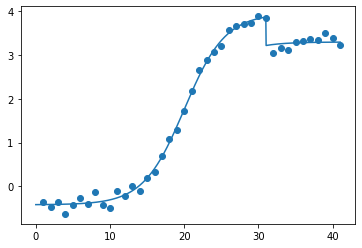

In [214]:
a, b, c, d, e, f = fit.values[:]
a_err, b_err, c_err, d_err, e_err, f_err = fit.errors[:]

x_fit = np.linspace(0, len(month), 1000)
plt.scatter(month, deficit)
plt.plot(x_fit, func(x_fit, a, b, c, d, e, f))

In [215]:
print(f'{e:.3}  \u00B1 {e_err:.3}')

0.652  ± 0.0773


NameError: name 'mu1' is not defined

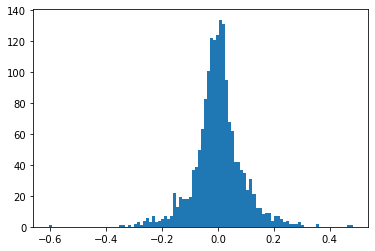

In [87]:
timings = np.genfromtxt('https://www.nbi.dk/~petersen/Teaching/Stat2016/data_TimingResiduals.txt')
timings_range= (np.min(timings), np.max(timings))
bins = int(np.sqrt(len(timings)))
bins = 100
counts, bin_edges, _ = plt.hist(timings, bins = bins, range = timings_range)
mask = counts > 0
x = ((bin_edges[1:] + bin_edges[:-1])/2)[mask]
counts = counts[mask]

def gauss_pdf(x, mu, sigma) :
    return 1.0 / np.sqrt(2*np.pi) / sigma * np.exp( -0.5 * (x-mu)**2 / sigma**2)

def double_gauss_pdf(x, N, f, mu, sigma1, sigma2) :
    return N * (f * gauss_pdf(x, mu1, sigma1) + (1-f) * gauss_pdf(x, mu2, sigma2))

k = (timings_range[1] - timings_range[0]) / bins          # binwidth
N = 1000 * k             # Normalization
    
def chi2_1(mu, sigma):
    y_model = N * gauss_pdf(x, mu, sigma)
    return np.sum((counts - y_model)**2 / counts)

def chi2_2(N, f, mu, sigma1, sigma2):
    y_model = double_gauss_pdf(x, N, f, mu, sigma1, sigma2)
    return np.sum((counts - y_model)**2 / counts)

fit = Minuit(chi2_2, 400, 0.2, 0, 0.7, 0.2) 
fit.errordef = 1
fit.migrad()

In [345]:
N, f, mu, sigma1, sigma2

(154.486889740387,
 0.8965156435864907,
 0.0,
 10.230332007584064,
 0.06112668612503208)

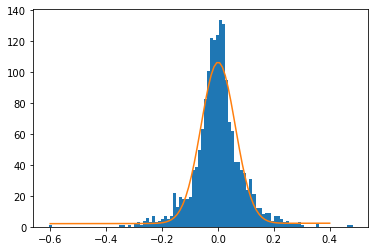

In [344]:
N, f, mu, sigma1, sigma2 = fit.values[:]

plt.hist(timings, bins = bins, range = timings_range)
x_fit = np.linspace(-0.6, 0.4, 100)
plt.plot(x_fit, double_gauss_pdf(x_fit,N, f, mu, sigma1, sigma2))

In [88]:
print(stats.shapiro(timings))

ShapiroResult(statistic=0.9525038003921509, pvalue=3.1209221210384895e-23)


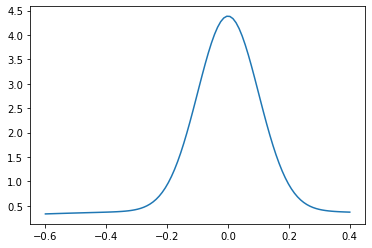